In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
colors = pd.read_csv("colors.csv")
themes = pd.read_csv("themes.csv")
sets = pd.read_csv("sets.csv")


In [3]:
colors.head()
colors.shape


(135, 4)

In [4]:
themes.head()
themes.shape


(596, 3)

In [5]:
sets.head()
sets.shape


(15710, 5)

In [6]:
sets["year"].min()


1949

In [13]:
#En Büyük LEGO Setini Bulma (Parça Sayısına Göre)
sets.sort_values("num_parts", ascending=False).head(1)


,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987


In [14]:
sets_by_year = sets.groupby("year").count()["set_num"]
sets_by_year.head()


year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

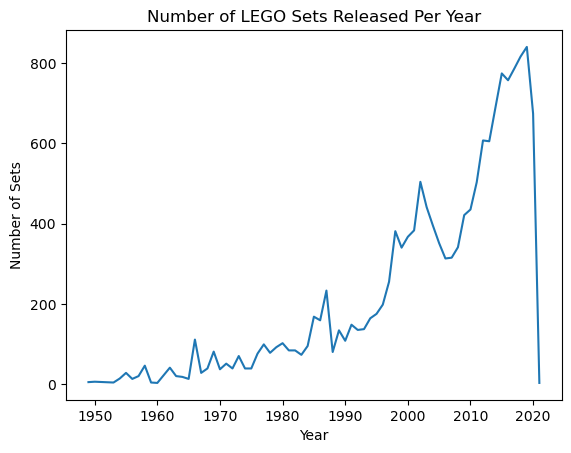

In [8]:
plt.plot(sets_by_year.index, sets_by_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of LEGO Sets Released Per Year")
plt.show()


In [9]:
parts_per_year = sets.groupby("year").sum()["num_parts"]
parts_per_year.head()


year
1949     498
1950       6
1953      54
1954     173
1955    1025
Name: num_parts, dtype: int64

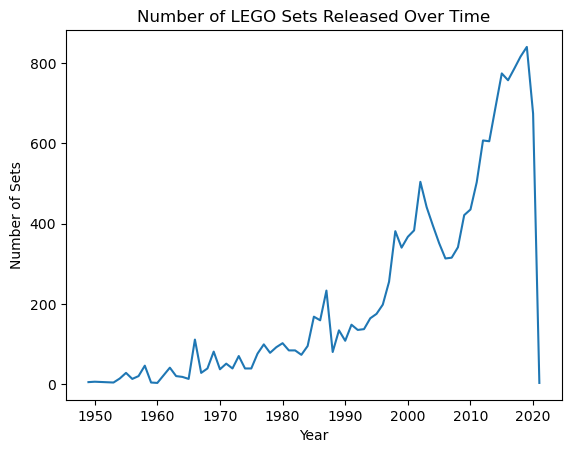

In [15]:
plt.plot(sets_by_year.index, sets_by_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of LEGO Sets Released Over Time")
plt.show()


In [16]:
sets.groupby("year").agg({
    "num_parts": ["mean", "max"]
})


num_parts      
            mean   max
year                  
1949   99.600000   178
1950    1.000000     1
1953   13.500000    48
1954   12.357143    54
1955   36.607143   200
...          ...   ...
2017  221.840967  7541
2018  213.618873  6020
2019  207.510714  4784
2020  259.732938  5547
2021    0.000000     0

[71 rows x 2 columns]

In [17]:
parts_per_year = sets.groupby("year").sum()["num_parts"]


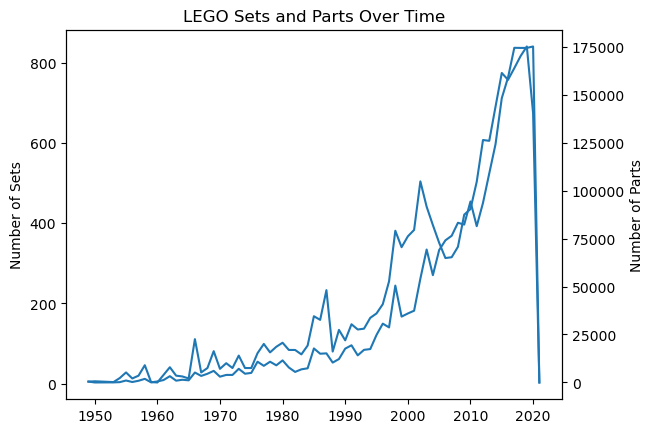

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(sets_by_year.index, sets_by_year.values)
ax1.set_ylabel("Number of Sets")

ax2 = ax1.twinx()
ax2.plot(parts_per_year.index, parts_per_year.values)
ax2.set_ylabel("Number of Parts")

plt.title("LEGO Sets and Parts Over Time")
plt.show()
